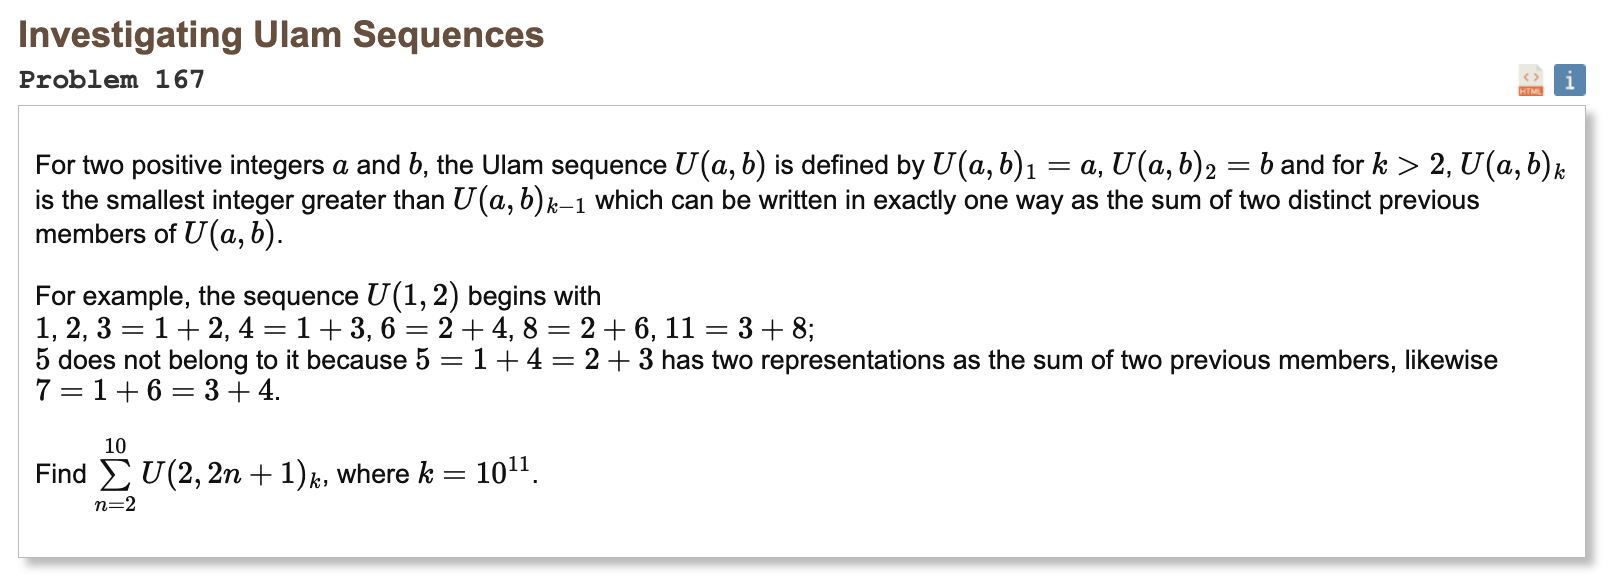

## Initial approach

* build Ulam sequence U(2, b) for odd b using a small rolling list of sums
* each new term is the smallest number > last that can be written as a + b exactly once
* for U(2, b) with odd b, the gap pattern repeats after some point
* detect the period in the last differences and skip directly to the n-th term
* reuse already seen values efficiently with dictionaries
* sum the n-th term of each U(2, b) for b = 2n + 1 where n ≤ M
* result computed quickly even for M = 1000

```python
%%time

def ulam_2b_nth(b, n):
    seq = [2, b]
    counts = {2 + b: 1}
    cur = b + 1
    diffs = []
    while len(seq) < n + 2000:  
        while counts.get(cur, 0) != 1:
            cur += 1
        seq.append(cur)
        diffs.append(cur - seq[-2])
        for x in seq[:-1]:
            s = x + cur
            counts[s] = counts.get(s, 0) + 1
        cur += 1
        if len(diffs) >= 2000 and diffs[-1000:] == diffs[-2000:-1000]:
            pre, per = len(seq) - 1 - 1000, diffs[-1000:]
            plen, psum = len(per), sum(per)
            if n <= pre:
                return seq[n - 1]
            extra = n - pre - 1
            return seq[pre] + (extra // plen) * psum + sum(per[:extra % plen])
    return seq[n - 1]

def solve(M):
    return sum(ulam_2b_nth(2 * k + 1, k) for k in range(2, M + 1))

print("Result:", solve(1000))

```

* it takes too long
* for M = 1000 sequences, roughly a billion pair updates overall
* needs optimization